**YOUR NAME HERE**

Fall 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Analyzing the results of PCA

In this task, you will apply PCA to the Iris dataset and analyze properties of the PCA representation.

### 3a. Import Iris data

In the cell below:
- load in the Iris dataset into a pandas DataFrame.
- select all numeric headers (i.e. drop `species`).
- Print out the head (only showing the first 5 data samples).

You should see (with better formatting):

```
	sepal_length	sepal_width	petal_length	petal_width
0	5.1	3.5	1.4	0.2
1	4.9	3.0	1.4	0.2
2	4.7	3.2	1.3	0.2
3	4.6	3.1	1.5	0.2
4	5.0	3.6	1.4	0.2
```

In [216]:
iris = pd.read_csv('data/iris.csv')

iris_pca = pca.PCA(iris)
iris_headers = list(iris.columns)

iris_pca.fit(iris_headers[:-1],normalize_dataset=True)
print(iris_headers[:-1])  # Confirm the data contains only 4 columns
iris_pca.e_vecs.shape

['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']


(4, 4)

### 3b. Apply PCA to Iris

You should make the following plots:
1. Elbow plot of cumulative variance accounted for by first $k$ principal components.
2. Written description of your choice of number of PCs preserved and why.
3. Visualization (plot) of PCA projected data on 1st two PCs.

You should normalize the dataset when performing your PCA projection.

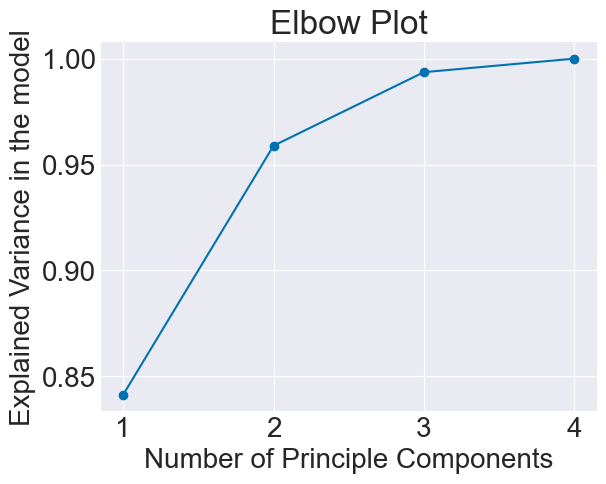

In [217]:
iris_pca.elbow_plot()

I would choose to limit the number of PC's to 2 because with only 2 pc's you can explain roughly 95% of the data and including further pc's will add diminishing levels of explained variance. 95% of explained variance with only two PC's will achieve the lowest principle components with the relatively highest explained variacne. Also that is where we can see the "joint" in the elbow.

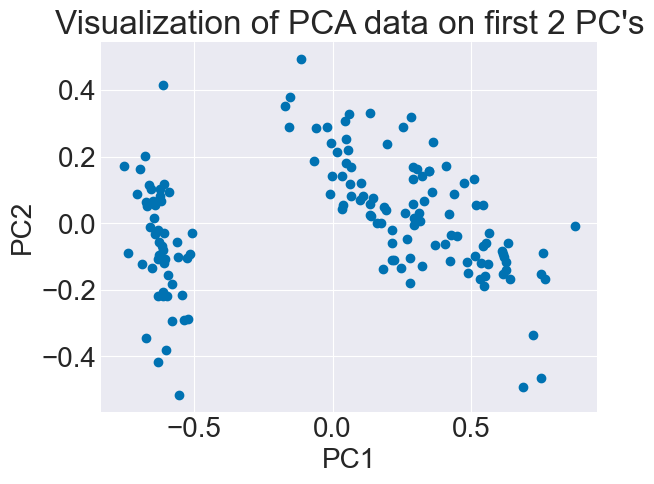

In [218]:
num_dims = 4
pcs_to_keep = np.arange(num_dims)
iris_proj = iris_pca.pca_project(pcs_to_keep)

plt.plot(iris_proj[:, 0], iris_proj[:, 1], 'o' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Visualization of PCA data on first 2 PC's")
plt.show()

### 3c. Dropping different pairs of principal components

In the cell below, create a "high quality" 2x2 subplots grid of scatter plots that drops different consecutive PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [3, 4]
- (top-right) PCs [2, 3]
- (bottom-left) PCs [4, 1]
- (bottom-right) PCs [1, 2]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legible.

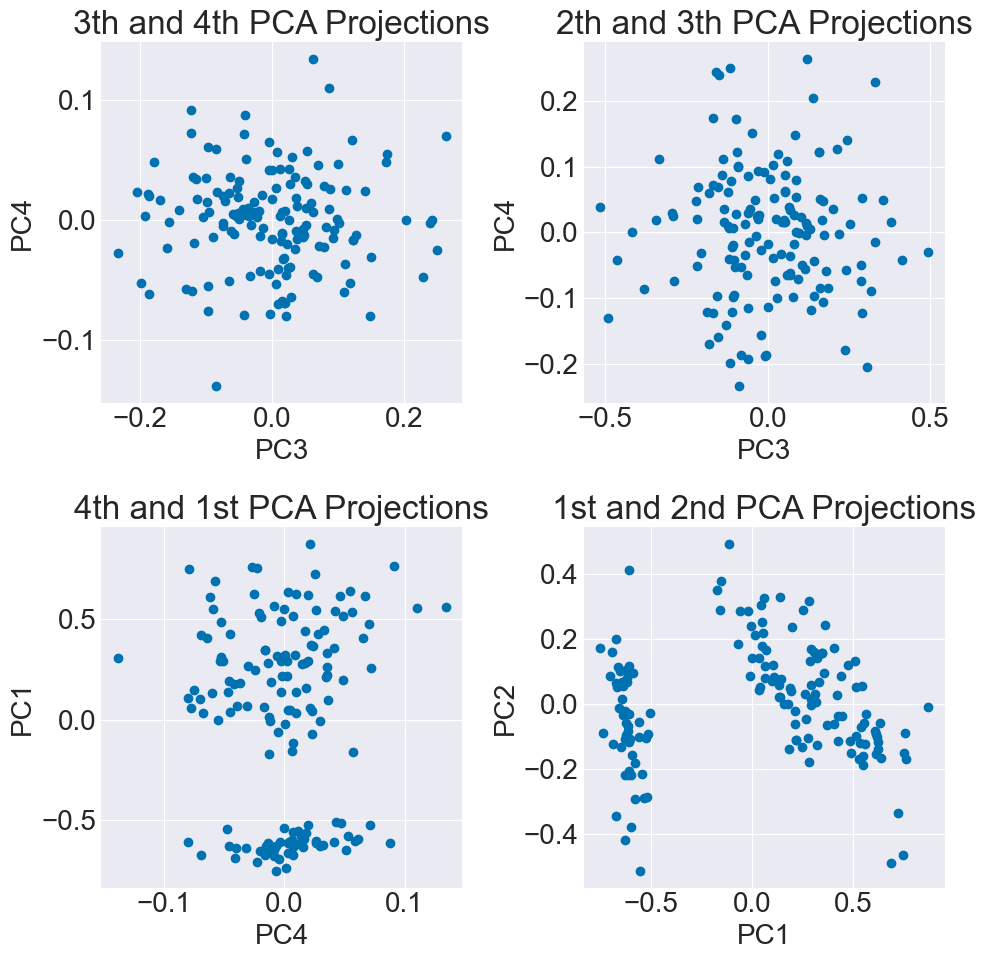

In [219]:


fig, axs = plt.subplots(2,2,figsize=(10, 10))

num_dims = 4
pcs_to_keep = np.arange(num_dims)
iris_proj = iris_pca.pca_project(pcs_to_keep)
axs[0,0].plot(iris_proj[:, 2], iris_proj[:, 3], 'o' )
axs[0,0].set_title("3th and 4th PCA Projections")
axs[0, 0].set_xlabel('PC3')
axs[0, 0].set_ylabel('PC4')

iris_proj = iris_pca.pca_project(pcs_to_keep)
axs[0,1].plot(iris_proj[:, 1], iris_proj[:, 2], 'o' )
axs[0,1].set_title("2th and 3th PCA Projections")
axs[0, 1].set_xlabel('PC3')
axs[0, 1].set_ylabel('PC4')


iris_proj = iris_pca.pca_project(pcs_to_keep)
axs[1,0].plot(iris_proj[:, 3], iris_proj[:, 0], 'o' )
axs[1,0].set_title("4th and 1st PCA Projections")
axs[1, 0].set_xlabel('PC4')
axs[1, 0].set_ylabel('PC1')


iris_proj = iris_pca.pca_project(pcs_to_keep)
axs[1,1].plot(iris_proj[:, 0], iris_proj[:, 1], 'o' )
axs[1,1].set_title("1st and 2nd PCA Projections")
axs[1, 1].set_xlabel('PC1')
axs[1, 1].set_ylabel('PC2')

plt.tight_layout()
plt.show()




### 3d. Questions

**Question 8:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 8:** 
Because there is a unique shape created by the 1st and 2nd pca projection, we understand that these first 2 PCA's do not vary together and including these 2 PC's in the plot will account for capturing a combined lot of explained variability in the data. This is because when PC1 and PC2 are uncorrelated they can provide distinct patterns in the data. The latter 2 graphs on the top show high covariance among their PC's suggesting that when both PC's are added to the overall PCA those 2 PC's will not contribute to explaining much more variability in the dataset. They are better off being left out. As for the final bottom right PCA, we can see that there is a pattern in the data to suggest that including another PC other than the 1st PC is necessary for explaining this dataset. If you look at the variability along the PC4 axis it has high variance and no pattern versus PC1 which has more of a pattern to it because of that pause from 0.0 to -0.5.



### 3e. Reconstruct data based on PCs

In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space. Then in the cell below, create a scatter plot of the two data variables `sepal_length` (x), `sepal_width` (y) of the Iris data **without any normalization**.

In the cell below, apply PCA on the Iris dataset **without any normalization** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepal_length`, `sepal_width` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your `sepal_length`, `sepal_width` plot created one cell above — including the data range and center).

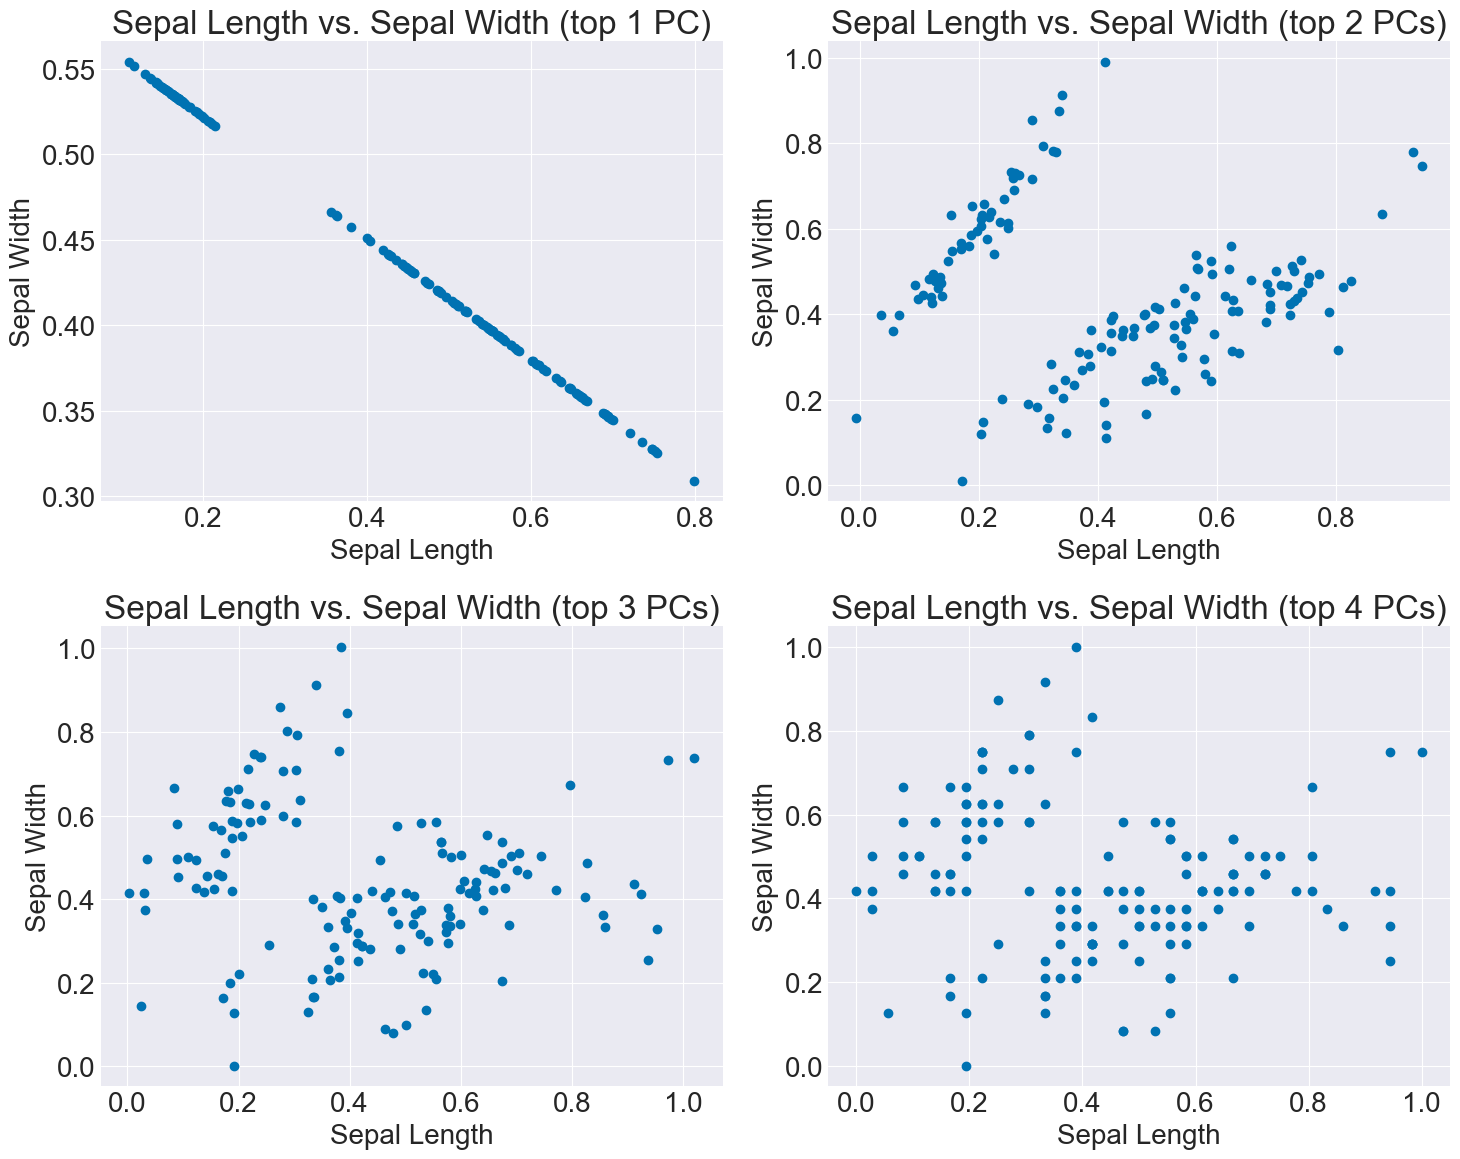

In [220]:

fig, axs = plt.subplots(2,2,figsize=(15, 12))

iris_proj = iris_pca.pca_then_project_back(1)
axs[0, 0].plot(iris_proj[:, 0], iris_proj[:, 1], 'o')
axs[0, 0].set_title("Sepal Length vs. Sepal Width (top 1 PC)")
axs[0, 0].set_xlabel('Sepal Length')
axs[0, 0].set_ylabel('Sepal Width')

iris_proj = iris_pca.pca_then_project_back(2)
axs[0, 1].plot(iris_proj[:, 0], iris_proj[:, 1], 'o')
axs[0, 1].set_title("Sepal Length vs. Sepal Width (top 2 PCs)")
axs[0, 1].set_xlabel('Sepal Length')
axs[0, 1].set_ylabel('Sepal Width')

iris_proj = iris_pca.pca_then_project_back(3)
axs[1, 0].plot(iris_proj[:, 0], iris_proj[:, 1], 'o')
axs[1, 0].set_title("Sepal Length vs. Sepal Width (top 3 PCs)")
axs[1, 0].set_xlabel('Sepal Length')
axs[1, 0].set_ylabel('Sepal Width')

iris_proj = iris_pca.pca_then_project_back(4)
axs[1, 1].plot(iris_proj[:, 0], iris_proj[:, 1], 'o')
axs[1, 1].set_title("Sepal Length vs. Sepal Width (top 4 PCs)")
axs[1, 1].set_xlabel('Sepal Length')
axs[1, 1].set_ylabel('Sepal Width')

plt.tight_layout()
plt.show()

### 3f. Questions

**Question 9:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 9:** The first plot is not able preserve the properties because it is basically one dimensional. However, from 2 principal components to 4 the projects preserve the properties of the dataset quite well. The 2x2 plot plots the relationship between sepal length and sepal width with dimesnionality reduction from 1 principle component up to 4.

### 3g. Implement loading plot

To visualize how the top two principal components relate to original data variables, implement `loading_plot` in `pca.py`.

4


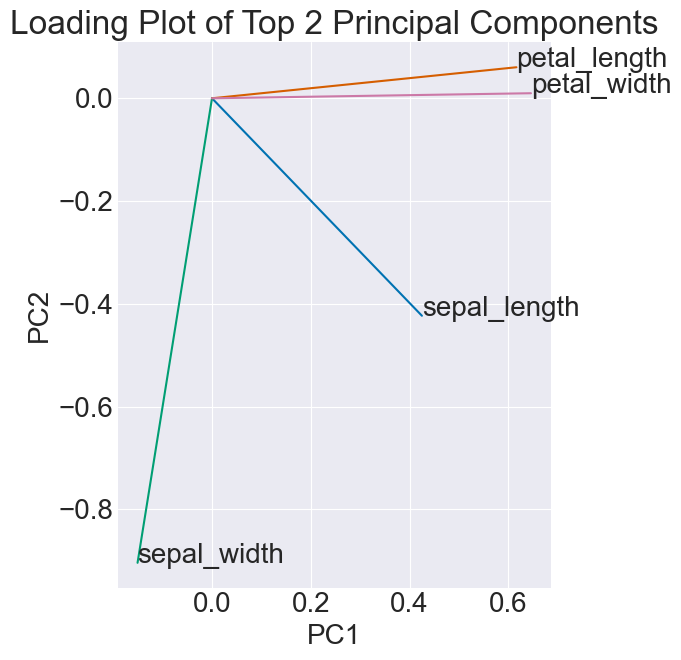

In [221]:
iris_pca.loading_plot()
plt.tight_layout()
plt.show()

### 3h. Questions

**Question 10:** Call your `loading_plot` method to generate a loading plot of the Iris dataset. What do the loadings tell us what the first two PCs measure specifically, with respect to the original data variables?

**Question 11:** What specific correlations among original data variables do the loadings help us identity?

**Answer 10:** 
The loadings tell us that the first PC's utilize sepalwidth the most in the loading plot followed by sepal length and then petal width and length.

**Answer 11:** 
There is a storng corelation between petal length and petal width which help us identify that it is likely that we only need one of those two vectors to explain most of the data.